# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import collections
from lmfit import Minimizer, Parameters, report_fit
from lmfit.lineshapes import gaussian, lorentzian, split_lorentzian
from scipy import integrate
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('df_t120.csv')
# Use read_csv function to read .csv file.

df.rename(columns={'Unnamed: 0': 'Original Index'}, inplace=True)
# Rename the column label of the 0th column in place.
df.iloc[:30,:]

Original Index  Condition  99.878393  104.389608  108.898643  113.403376  \
0               80          1     4037.0      4351.0      4507.0      4274.0   
1               81          1     3949.0      4447.0      4579.0      4230.0   
2               82          1     4019.0      4294.0      4366.0      4223.0   
3               83          1     4029.0      4388.0      4439.0      4058.0   
4               84          1     4055.0      4437.0      4619.0      4163.0   
5               85          1     3872.0      4394.0      4461.0      4211.0   
6               86          1     4078.0      4407.0      4562.0      4230.0   
7               87          1     4075.0      4432.0      4531.0      4335.0   
8               88          1     4017.0      4462.0      4498.0      4184.0   
9               89          1     3924.0      4447.0      4514.0      4193.0   
10              90          1     4008.0      4324.0      4398.0      4126.0   
11              91          1     3942.0      4261.0      4395.0      4210.0   
12              92          1     3973.0      4370.0      4509.0      4204.0   
13              93          1     4022.0      4300.0      4482.0      4303.0   
14              94          1     3988.0      4462.0      4548.0      4303.0   
15              95          1     3968.0      4484.0      4383.0      4180.0   
16              96          1     4085.0      4453.0      4625.0      4350.0   
17              97          1     4010.0      4436.0      4503.0      4159.0   
18              98          1     4046.0      4426.0      4565.0      4321.0   
19              99          1     4036.0      4356.0      4514.0      4196.0   
20             200          2     5846.0      6427.0      6528.0      6280.0   
21             201          2     5652.0      6375.0      6516.0      6141.0   
22             202          2     5690.0      6506.0      6642.0      6201.0   
23             203          2     5858.0      6427.0      6575.0      6253.0   
24             204          2     5756.0      6547.0      6505.0      6190.0   
25             205          2     5585.0      6412.0      6488.0      6079.0   
26             206          2     5780.0      6281.0      6332.0      6132.0   
27             207          2     5659.0      6355.0      6481.0      6028.0   
28             208          2     5592.0      6191.0      6307.0      5901.0   
29             209          2     5619.0      6271.0      6429.0      5981.0   

    117.905935  122.406320  126.902413  131.394219  ...  2470.539441  \
0       4114.0      3487.0      3250.0      2991.0  ...        212.0   
1       4009.0      3436.0      3162.0      2964.0  ...        170.0   
2       3968.0      3432.0      3176.0      3016.0  ...        150.0   
3       3931.0      3458.0      3231.0      2993.0  ...        183.0   
4       4027.0      3629.0      3279.0      3012.0  ...        130.0   
5       3917.0      3501.0      3249.0      3050.0  ...        138.0   
6       3929.0      3548.0      3154.0      2982.0  ...        125.0   
7       3975.0      3621.0      3239.0      2978.0  ...        102.0   
8       3823.0      3542.0      3240.0      3083.0  ...        130.0   
9       3915.0      3564.0      3187.0      3023.0  ...         87.0   
10      4066.0      3555.0      3185.0      3001.0  ...        176.0   
11      3874.0      3473.0      3106.0      3058.0  ...        125.0   
12      3754.0      3632.0      3171.0      2942.0  ...        112.0   
13      4000.0      3508.0      3241.0      2997.0  ...         96.0   
14      3913.0      3501.0      3217.0      2912.0  ...        162.0   
15      3933.0      3580.0      3335.0      2932.0  ...        146.0   
16      3904.0      3580.0      3259.0      2891.0  ...        139.0   
17      3954.0      3574.0      3193.0      2941.0  ...        132.0   
18      3985.0      3553.0      3336.0      2979.0  ...        107.0   
19      3994.0      3558.0      3142.0      3137.0  ...        114.0   
20      576

In [3]:
t120_c2 = df.iloc[20,2:]
t120_c2.to_excel(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\2. Data - Consolidated (w_i for MWD)\210419 Waterfall plot for raman excel files\ c2_t120_single_spectra.xlsx')

# Test Plots and Baseline Correction

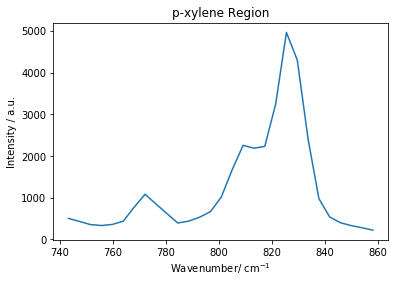

In [3]:
# Extract relevant p-xylene region and Vinyl region from the 1st spectra for
# baseline correction and plot tests.

pxyl_Region = df.iloc[0, 151:180] # Extract 1st spectra at the pxyl region and plot.
pxyl_Region.index = pxyl_Region.index.astype(float) # Change the index type to float.
pxyl_Region.plot()
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('p-xylene Region')
plt.show()

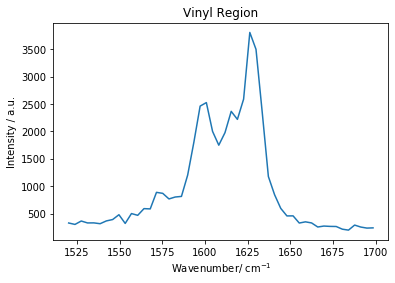

In [4]:
Vinyl_Region = df.iloc[0, 350:400] # Extract 1st spectra at the Vinyl region and plot.
Vinyl_Region.index = Vinyl_Region.index.astype(float) # Change the index type to float.
Vinyl_Region.plot()
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('Vinyl Region')
plt.show()

# Baseline Subtraction

## Custom

Choose two regions on the spectrum that you want to form the basis for the baseline. The spectrum is based on the truncated region of interest from the raw spectrum.

Choose from the curve above, <10 and >50 to form the x and y values to fit a polynomial line, serving as my baseline values. **Note that the x-axis is the placeholder index location of the truncated spectra, not the actual wavenumbers themselves**

p-xylene Region Baseline Subtraction

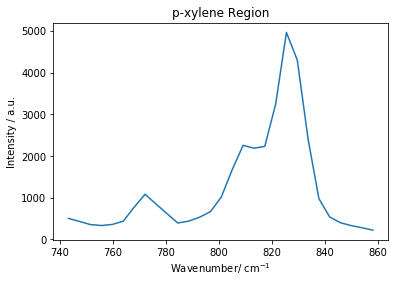

In [5]:
# p-xylene Region Baseline Subtraction
y = df.iloc[0, 151:180]
y.index = y.index.astype('float')
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('p-xylene Region')
y.plot()
plt.show()

# y is a Series. A pandas Series is a lablled/ indexed 1-D array. Therefore, a single argument of y,
# itself containing the intensity value (y-axis) at the corresponding wavenumber (x-axis) can be plotted. 

# Plot the 1st spectra (1st row) of df_t0.

In [6]:
xbl = [] # x-baseline.

for items in y.index[:5].values.tolist():
    xbl.append(items)

for items in y.index[25:].values.tolist():
    xbl.append(items)

# Recall that y is a Series with intensities labelled by their wavenumbers. y.index gives the Series labels, which are the 
# wavenumbers. y.index[:10] gives the 0th to 9th Series labels and is an index object. Convert the index object to a numpy
# array via y.index[:10].values, then put them into a list via y.index[:10].values.tolist().

# There are 2 for loops for the xbl (x baseline) list because you want the 1st 10 wavenumbers, but you also want the last
# wavenumbers from index 40 onwards. In the end, xbl is a single list containing all wavenumbers from index 0 to 9,
# and then from index 40 onwards. The same ideas apply for ybl, except for the fact that ybl contains intensities.

ybl = [] # y-baseline.

for items in y.values[:5].tolist():
    ybl.append(items)

for items in y.values[25:].tolist():
    ybl.append(items)
    
# y is a Pandas Series. Therefore, y.values immediately gives the values witihn that series, which are the intensities.

In [7]:
# Check that the range of xbl and ybl values makes sense.
xbl_and_ybl = list(zip(xbl, ybl))# Zip xbl and ybl together, then use list function to unpack the zipped object.
xbl_and_ybl

[(743.246211, 503.0),
 (747.374586, 431.0),
 (751.503053, 356.0),
 (755.629629, 333.0),
 (759.752335, 359.0),
 (845.789456, 399.0),
 (849.859242, 330.0),
 (853.927181, 279.0),
 (857.993273, 223.0)]

Running the baseline fit. **(x-values, y-values, polynomial degree)** are the arguments.

In [8]:
blpars = np.polyfit(xbl, ybl, 1)
# blpars contains the baseline parameters; the coefficients which will allow for the baseline polynomial to be defined.
# Fit a polynomial based on the x and y-values chosen for the spectra during the previous step. Thus, given a list of x values
# and its corresponding y-values, fit a polynomial through these points as best as you can. This polynomial will serve as the 
# baseline to be subtracted from the spectra's y-values. 
# numpy.polyfit(x, y, deg)
# np.polyfit: Least squares polynomial fit. Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y).
# Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
# Since degree = 1, we are fitting a straight line.

blfit = np.poly1d(blpars)
# A one-dimensional polynomial class. A convenience class, used to encapsulate “natural” operations on polynomials so that
# said operations may take on their customary form in code. blfit is a function that encompasses information on blpar's vector
# of coefficients derived from the np.polyfit step. It will take an input of x-values, then apply the coefficients to the
# x-values to obtain the best fit polynomial following the p(x) equation defined above.

Plot showing before and after subtraction.

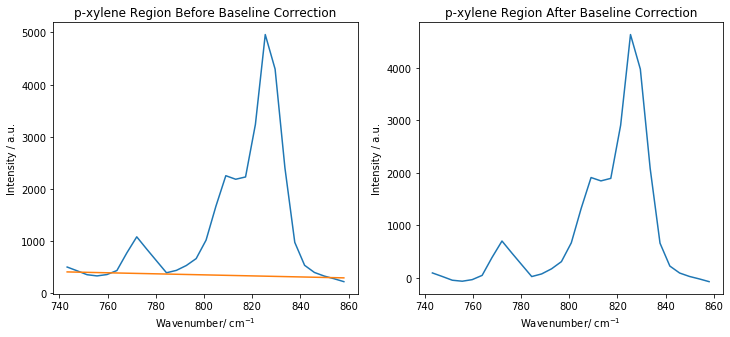

In [9]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1) # subplot(nrows, ncols, index)
plt.plot(y) # Plot the spectrum using the Series y.
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('p-xylene Region Before Baseline Correction')
plt.plot(y.index, blfit(y.index))
# Plot the baseline polynomial to be subtracted (orange color). The x-axis will contain the wavenumbers. 
# Therefore y.index(Series labels) is being plotted at the x-axis. The y-axis will be blfit(y.index) because the output of 
# blfit(y.index) contains the y-values of the polynomial that is best fit to the input x-values.

plt.subplot(1,2,2)
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('p-xylene Region After Baseline Correction')
plt.plot(y.index,(y - blfit(y.index)))
# Plot the baseline corrected spectrum. Subtraction can immediately be done because blfit(y.index) is a numpy array of y-values
# of the best fit polynomial. So the each value in Series y will minus each value in array blfit(y.index),
# to yield a final y value, which is the corrected spectra intensity. 

plt.show()

Vinyl Region Baseline Subtraction

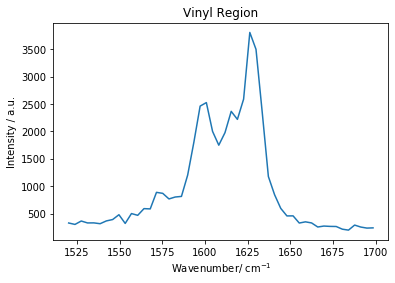

In [10]:
# Vinyl Region Baseline Subtraction
y = df.iloc[0, 350:400]
y.index = y.index.astype('float')
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('Vinyl Region')
y.plot()
plt.show()

In [11]:
xbl = []

for items in y.index[:10].values.tolist():
    xbl.append(items)

for items in y.index[40:].values.tolist():
    xbl.append(items)
    
ybl = []

for items in y.values[:10].tolist():
    ybl.append(items)

for items in y.values[40:].tolist():
    ybl.append(items)

In [12]:
xbl_and_ybl = list(zip(xbl, ybl))
xbl_and_ybl

[(1520.166942, 328.0),
 (1523.854586, 302.0),
 (1527.538839, 364.0),
 (1531.221518, 329.0),
 (1534.902625, 330.0),
 (1538.580347, 315.0),
 (1542.258312, 366.0),
 (1545.932896, 391.0),
 (1549.604104, 479.0),
 (1553.275555, 320.0),
 (1666.040602, 255.0),
 (1669.646513, 272.0),
 (1673.249121, 266.0),
 (1676.851994, 264.0),
 (1680.449784, 215.0),
 (1684.047842, 198.0),
 (1687.642603, 290.0),
 (1691.235853, 254.0),
 (1694.827591, 235.0),
 (1698.417818, 239.0)]

In [13]:
blpars = np.polyfit(xbl, ybl, 1)
blfit = np.poly1d(blpars)

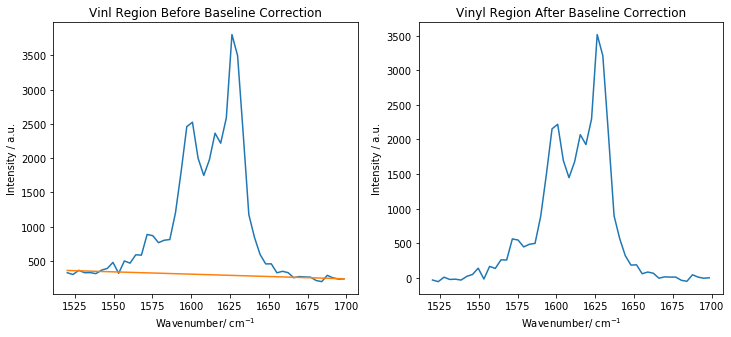

In [14]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.plot(y)
plt.plot(y.index, blfit(y.index))
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('Vinl Region Before Baseline Correction')

plt.subplot(1,2,2)
plt.plot(y.index,(y - blfit(y.index))) 
plt.xlabel('Wavenumber/ cm$^{-1}$')
plt.ylabel('Intensity / a.u.')
plt.title('Vinyl Region After Baseline Correction')

plt.show()

# Fitting Functions

In [15]:
from lmfit import Minimizer, Parameters, report_fit
from lmfit.lineshapes import gaussian, lorentzian, split_lorentzian

def residuals(pars,x,y):
    
    model =  (lorentzian(x, pars['ampL1'], pars['cenL1'], pars['widL1']) +
              lorentzian(x, pars['ampL2'], pars['cenL2'], pars['widL2']))
    
    return model - y

# Running Curve Fits

In [16]:
df_vinyl = df.iloc[:, 350:400].copy()
df_vinyl.columns = df_vinyl.columns.astype('float')
df_vinyl

1520.166942  1523.854586  1527.538839  1531.221518  1534.902625  \
0          328.0        302.0        364.0        329.0        330.0   
1          290.0        283.0        287.0        295.0        298.0   
2          342.0        312.0        305.0        353.0        382.0   
3          280.0        317.0        246.0        286.0        352.0   
4          251.0        266.0        289.0        226.0        387.0   
..           ...          ...          ...          ...          ...   
175        372.0        350.0        358.0        465.0        474.0   
176        304.0        366.0        353.0        445.0        448.0   
177        392.0        322.0        349.0        406.0        428.0   
178        338.0        323.0        371.0        407.0        360.0   
179        314.0        303.0        295.0        450.0        401.0   

     1538.580347  1542.258312  1545.932896  1549.604104  1553.275555  ...  \
0          315.0        366.0        391.0        479.0        320.0  ...   
1          323.0        386.0        380.0        446.0        375.0  ...   
2          318.0        357.0        381.0        430.0        366.0  ...   
3          310.0        358.0        379.0        412.0        328.0  ...   
4          268.0        374.0        351.0        382.0        384.0  ...   
..           ...          ...          ...          ...          ...  ...   
175        445.0        469.0        534.0        534.0        488.0  ...   
176        434.0        405.0        515.0        501.0        536.0  ...   
177        462.0        464.0        538.0        506.0        486.0  ...   
178        417.0        471.0        435.0        531.0        468.0  ...   
179        424.0        409.0        489.0        590.0        476.0  ...   

     1666.040602  1669.646513  1673.249121  1676.851994  1680.449784  \
0          255.0        272.0        266.0        264.0        215.0   
1          305.0        239.0        221.0        230.0        151.0   
2          270.0        249.0        247.0        211.0        217.0   
3          269.0        253.0        252.0        296.0        215.0   
4          270.0        219.0        255.0        281.0        188.0   
..           ...          ...          ...          ...          ...   
175        314.0        313.0        321.0        369.0        230.0   
176        268.0        330.0        341.0        306.0        295.0   
177        354.0        353.0        296.0        309.0        258.0   
178        332.0        272.0        276.0        298.0        229.0   
179        320.0        324.0        293.0        295.0        260.0   

     1684.047842  1687.642603  1691.235853  1694.827591  1698.417818  
0          198.0        290.0        254.0        235.0        239.0  
1          202.0        252.0        253.0        150.0        212.0  
2          181.0        257.0        214.0        225.0        217.0  
3          208.0        237.0        240.0        153.0        273.0  
4          177.0        220.0        154.0        123.0        274.0  
..           ...          ...          ...          ...          ...  
175        274.0        288.0        222.0        182.0        294.0  
176        274.0        191.0        257.0        215.0        314.0  
177        312.0        305.0        290.0        198.0        285.0  
178        297.0        279.0        252.0        209.0        256.0  
179        203.0        263.0        304.0        195.0        279.0  

[180 rows x 50 columns]

For 2 Lorentzians peak fits within the region of interest:

## Select initial guess parameters, namely amplitude, centre, width of the peaks.

In [17]:
ampL1 = 100000 # Peak Amplitude of 1st Peak
cenL1 = 1599 # Peak location of 1st Peak
widL1 = 10

ampL2 = 100000 # Peak Amplitude of 2nd Peak
cenL2 = 1627 # Peak location of 2nd Peak
widL2 = 6

## Fitting and Plotting (Vinyl Region)

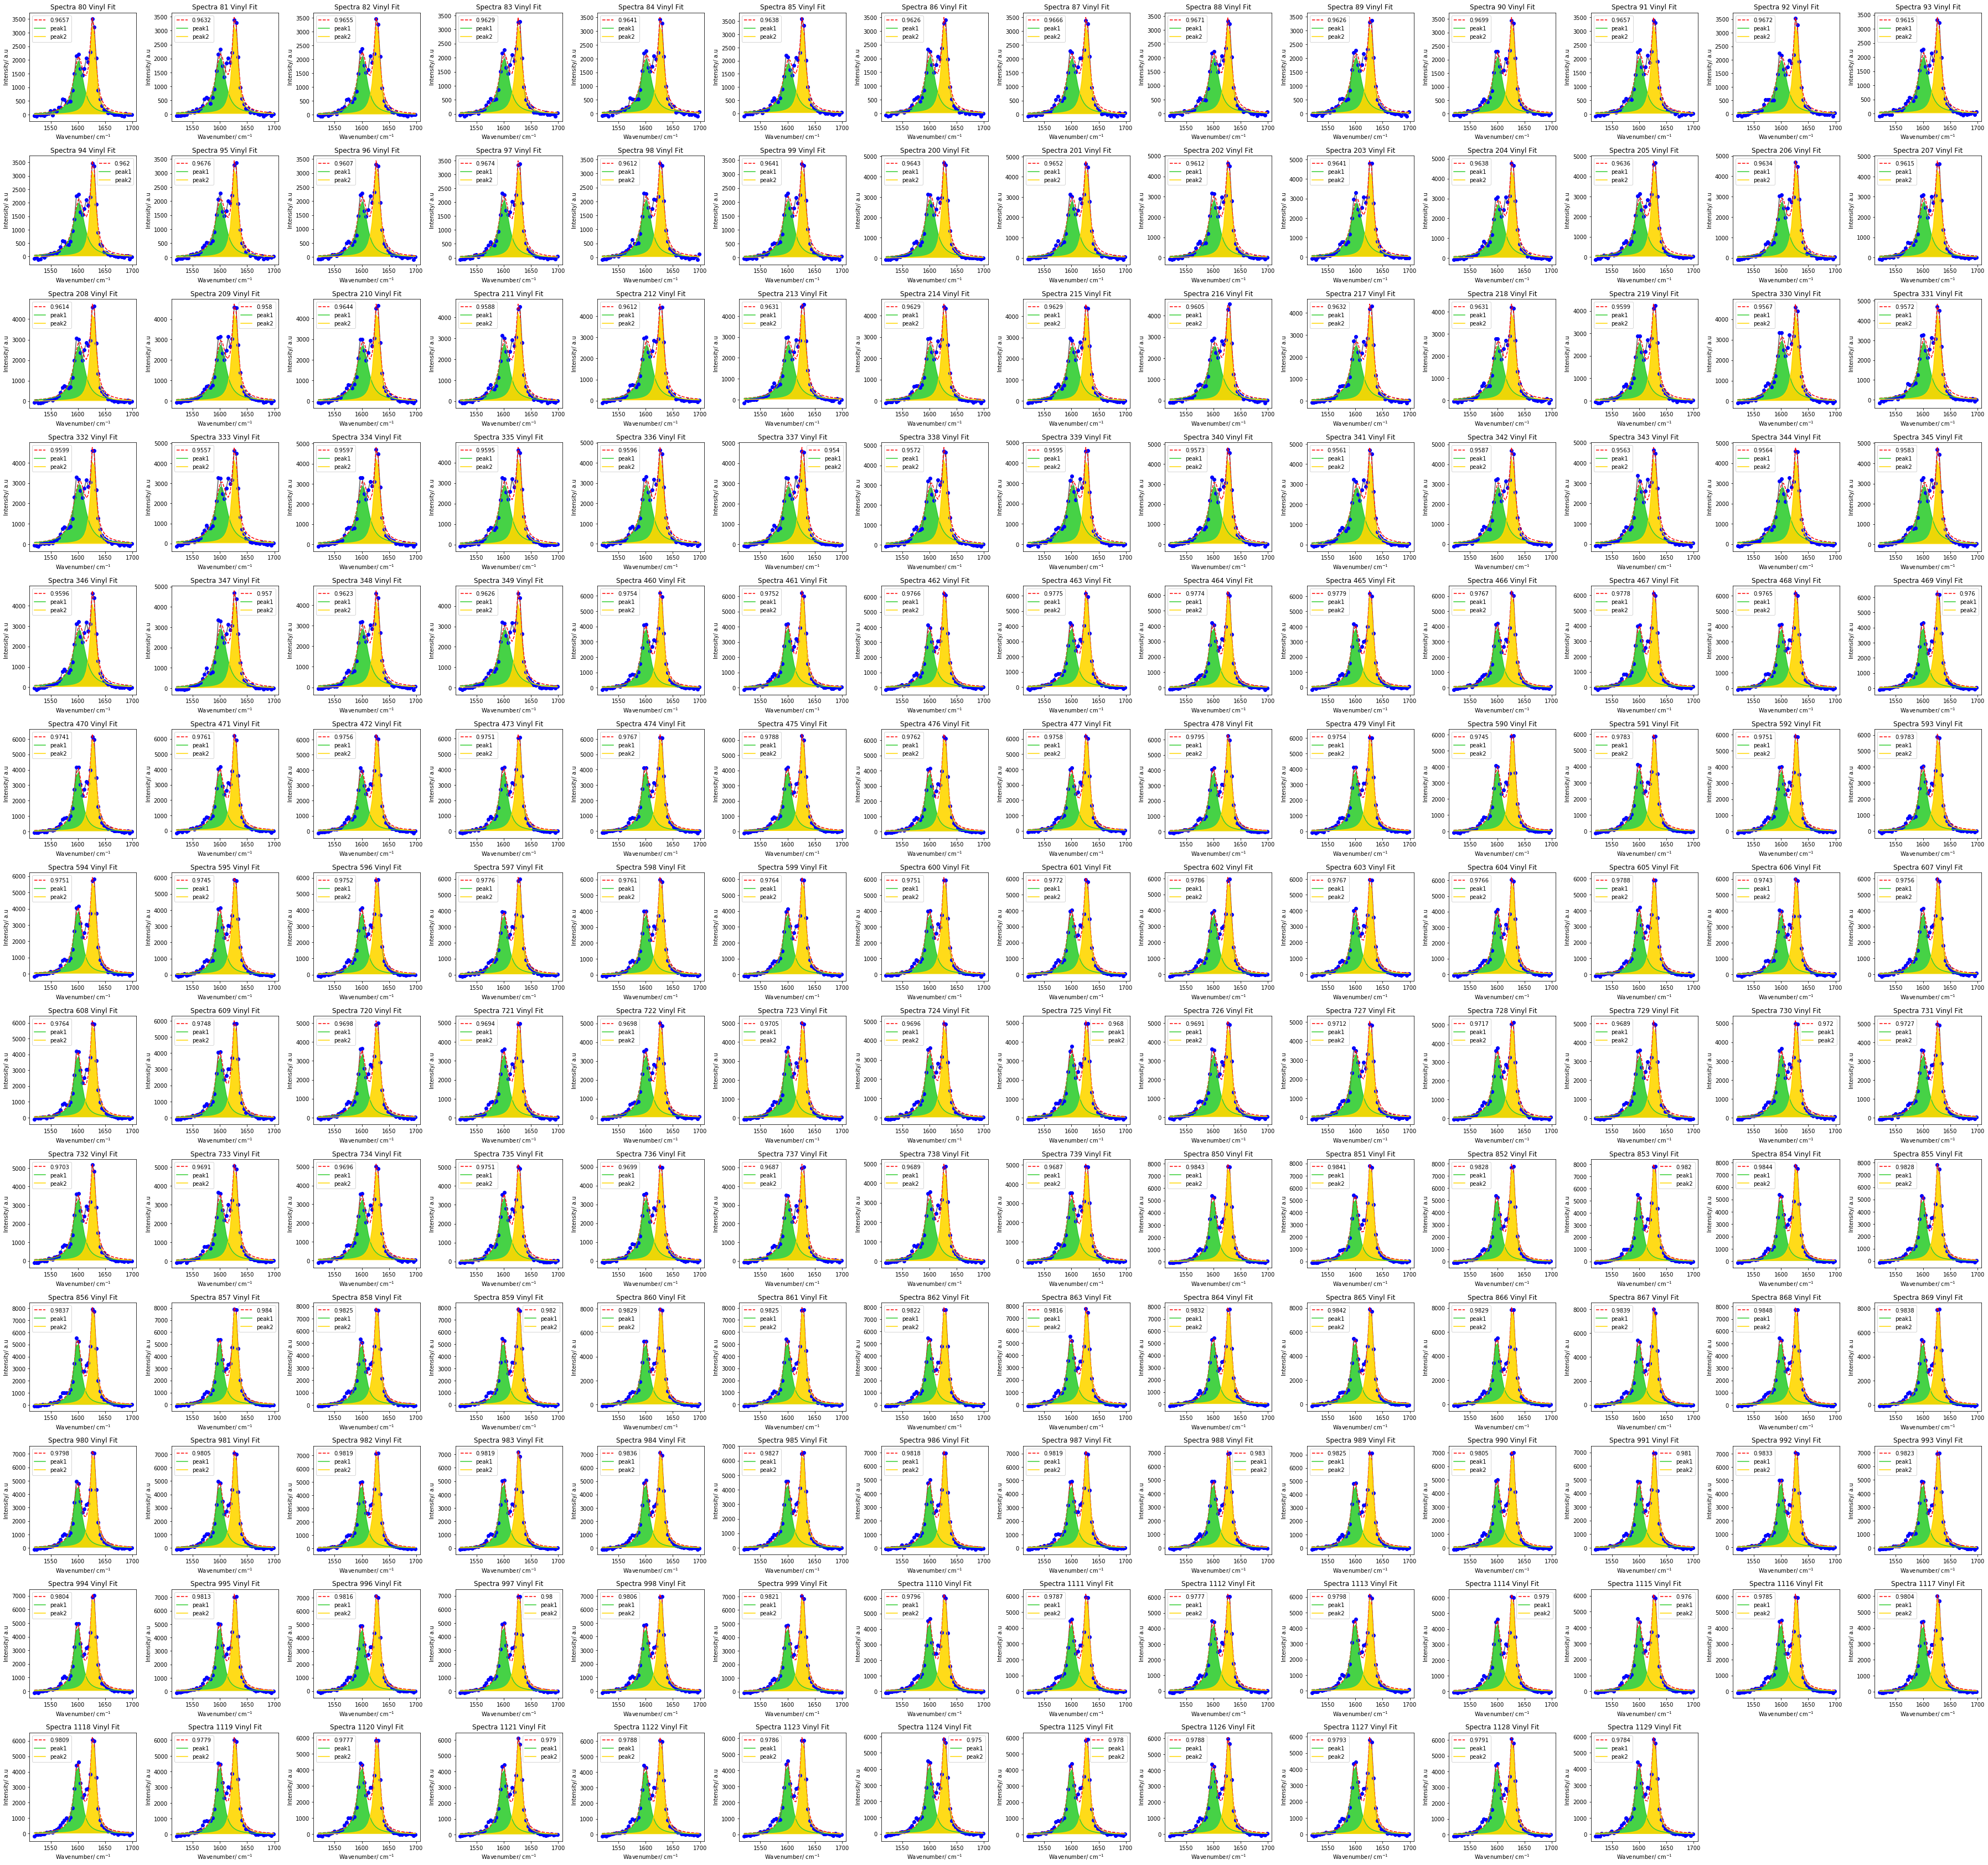

In [18]:
de = collections.deque([])
Area_1 = collections.deque([])
Area_2 = collections.deque([])

pbar = tqdm(total = len(df_vinyl), dynamic_ncols  = True, desc = 'Fitting curves')

plt.figure(figsize = (50,50))

pfit = Parameters()
pfit.add(name='ampL1', value = ampL1, min = 0)
pfit.add(name='ampL2', value = ampL2, min = 0)
pfit.add(name='cenL1', value = cenL1, max = 1605)
pfit.add(name='cenL2', value = cenL2, min = 1620, max = 1640)
pfit.add(name='widL1', value = widL1, min = 0)
pfit.add(name='widL2', value = widL2, min = 0)

for i,item in df_vinyl.iterrows():
    
    x = df_vinyl.columns # Wavenumbers
    
    y = item # Intensities
    
    xbl = []

    for items in y.index[:10].values.tolist():
        xbl.append(items)

    for items in y.index[40:].values.tolist():
        xbl.append(items)


    ybl = []

    for items in y.values[:10].tolist():
        ybl.append(items)

    for items in y.values[40:].tolist():
        ybl.append(items)
    
    blpars = np.polyfit(xbl, ybl, 1)
    blfit = np.poly1d(blpars)
    
    y -= blfit(x) # Corrected Intensities

    mini = Minimizer(residuals, pfit, fcn_args=(x, y))
    out = mini.leastsq()
    best_fit = y + out.residual
    
    fit_params = out.params.valuesdict()
    fit_params['R2'] = r2_score(y,best_fit)
    fit_params['FWHM_L1'] = 2*out.params.valuesdict()['widL1']
    fit_params['FWHM_L2'] = 2*out.params.valuesdict()['widL2']
    fit_params['Height_L1'] = 0.3183099*out.params.valuesdict()['ampL1']/max(2.220446049250313e-16, out.params.valuesdict()['widL1'])
    fit_params['Height_L2'] = 0.3183099*out.params.valuesdict()['ampL2']/max(2.220446049250313e-16, out.params.valuesdict()['widL2'])
    
    
    results = de.append(fit_params)
    
    peak1 = lorentzian(x,out.params.valuesdict()['ampL1'], out.params.valuesdict()['cenL1'], out.params.valuesdict()['widL1'])
    peak2 = lorentzian(x,out.params.valuesdict()['ampL2'], out.params.valuesdict()['cenL2'], out.params.valuesdict()['widL2'])
    
    plt.subplot(np.ceil(np.sqrt(df_vinyl.shape[0])),np.ceil(np.sqrt(df_vinyl.shape[0])),(1+i))
    plt.title('Spectra ' + str(df.loc[i, 'Original Index']) + ' Vinyl Fit')
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity/ a.u')
    plt.plot(x, y, '#606060')
    plt.plot(x, y, 'bo')
    plt.plot(x, best_fit, 'r--', label = str(fit_params['R2'].round(decimals = 4)))
    plt.plot(x, peak1,'#32CD32', label = 'peak1')
    plt.fill_between(x, peak1.min(), peak1, facecolor = '#32CD32', alpha = 0.9)
    plt.plot(x, peak2,'#FFD700', label = 'peak2')
    plt.fill_between(x, peak2.min(), peak2, facecolor = '#FFD700', alpha = 0.9)
    plt.legend(loc='best')
   
    Area_1.append(integrate.simps(peak1, x)) 
    Area_2.append(integrate.simps(peak2, x))
    
    pbar.update(1)
    
pbar.close()
    
plt.tight_layout()
plt.show()

In [19]:
results = pd.DataFrame(de)
results.rename(columns={'R2':'R2_Vinyl'}, inplace=True)
results.describe()

ampL1          ampL2        cenL1        cenL2       widL1  \
count     180.000000     180.000000   180.000000   180.000000  180.000000   
mean   108100.319697  105084.764178  1600.382284  1627.683662    9.905720   
std     15833.815440   25094.168222     0.995233     0.138868    1.655009   
min     67042.626788   58746.341502  1599.087884  1627.299608    7.720218   
25%    103774.023383   83961.446443  1599.544701  1627.599548    8.440301   
50%    110030.344809  111639.095799  1600.012137  1627.689528    9.312508   
75%    118713.519442  118005.105134  1601.170223  1627.792955   11.411573   
max    132455.096772  149084.826121  1602.888383  1628.069886   13.494435   

            widL2    R2_Vinyl     FWHM_L1     FWHM_L2    Height_L1  \
count  180.000000  180.000000  180.000000  180.000000   180.000000   
mean     5.964751    0.972381   19.811441   11.929501  3609.498142   
std      0.201251    0.008632    3.310018    0.402502   948.701263   
min      5.421646    0.954021   15.440435   10.843292  1894.310424   
25%      5.828596    0.964009   16.880602   11.657192  2855.868203   
50%      5.960842    0.975157   18.625015   11.921683  3754.652997   
75%      6.091436    0.979361   22.823145   12.182872  4298.563753   
max      6.567501    0.984830   26.988869   13.135001  5218.610152   

         Height_L2  
count   180.000000  
mean   5635.992756  
std    1448.166938  
min    3190.996051  
25%    4416.022441  
50%    5983.033742  
75%    6261.652793  
max    8318.342030

For 2 Lorentzians peak fits within the region of interest:

In [20]:
Area_2 = pd.Series(Area_2)
labels = df.iloc[:, 0:2]
df_area = pd.concat([labels, Area_2, results['R2_Vinyl']], axis=1)
df_area.rename(columns={0: 'Vinyl Peak Area'}, inplace=True)
df_area

Original Index  Condition  Vinyl Peak Area  R2_Vinyl
0                80          1     62242.450334  0.965687
1                81          1     60092.870923  0.963150
2                82          1     61602.716359  0.965474
3                83          1     61741.205455  0.962908
4                84          1     60742.694428  0.964101
..              ...        ...              ...       ...
175            1125          9    105502.910373  0.978015
176            1126          9    103469.737779  0.978815
177            1127          9    105655.691135  0.979317
178            1128          9    105422.083073  0.979061
179            1129          9    104903.072990  0.978365

[180 rows x 4 columns]

# Fitting and Plotting (p-xylene Region)

In [21]:
df_pxyl = df.iloc[:, 151:180].copy()
df_pxyl.columns = df_pxyl.columns.astype('float')
df_pxyl

743.246211  747.374586  751.503053  755.629629  759.752335  763.873155  \
0         503.0       431.0       356.0       333.0       359.0       436.0   
1         431.0       402.0       362.0       315.0       372.0       398.0   
2         514.0       521.0       372.0       333.0       355.0       458.0   
3         492.0       398.0       375.0       283.0       300.0       433.0   
4         478.0       454.0       363.0       340.0       374.0       427.0   
..          ...         ...         ...         ...         ...         ...   
175       632.0       602.0       557.0       585.0       627.0       813.0   
176       772.0       626.0       667.0       603.0       714.0       758.0   
177       686.0       677.0       632.0       635.0       730.0       788.0   
178       685.0       659.0       553.0       565.0       721.0       698.0   
179       681.0       629.0       579.0       483.0       708.0       773.0   

     767.992089  772.107162  776.220354  780.331667  ...  821.314169  \
0         774.0      1082.0       848.0       620.0  ...      3238.0   
1         743.0       997.0       868.0       499.0  ...      3169.0   
2         697.0      1035.0       915.0       575.0  ...      3250.0   
3         740.0      1036.0       891.0       563.0  ...      3126.0   
4         657.0      1010.0       832.0       596.0  ...      3226.0   
..          ...         ...         ...         ...  ...         ...   
175      1238.0      1760.0      1434.0      1001.0  ...      3911.0   
176      1261.0      1727.0      1574.0       923.0  ...      3920.0   
177      1254.0      1777.0      1501.0       996.0  ...      3860.0   
178      1237.0      1740.0      1458.0      1020.0  ...      3858.0   
179      1257.0      1782.0      1397.0      1015.0  ...      3765.0   

     825.397042  829.480022  833.561144  837.640410  841.715859  845.789456  \
0        4960.0      4298.0      2402.0       976.0       536.0       399.0   
1        4904.0      4448.0      2425.0       995.0       547.0       409.0   
2        5056.0      4494.0      2482.0       956.0       566.0       423.0   
3        4832.0      4603.0      2355.0      1004.0       539.0       363.0   
4        5029.0      4520.0      2490.0       961.0       509.0       395.0   
..          ...         ...         ...         ...         ...         ...   
175      5716.0      5336.0      2872.0      1264.0       757.0       564.0   
176      5933.0      5320.0      2895.0      1287.0       762.0       577.0   
177      6048.0      5337.0      2950.0      1256.0       756.0       577.0   
178      5743.0      5244.0      2869.0      1226.0       797.0       563.0   
179      5785.0      5180.0      2847.0      1245.0       746.0       562.0   

     849.859242  853.927181  857.993273  
0         330.0       279.0       223.0  
1         258.0       195.0       238.0  
2         359.0       304.0       223.0  
3         301.0       258.0       210.0  
4         312.0       277.0       211.0  
..          ...         ...         ...  
175       417.0       391.0       347.0  
176       412.0       383.0       424.0  
177       426.0       410.0       380.0  
178       401.0       366.0       359.0  
179       419.0       420.0       370.0  

[180 rows x 29 columns]

In [22]:
def residuals(pars,x,y):
    
    model =  (lorentzian(x, pars['ampL1'], pars['cenL1'], pars['widL1']) +
              lorentzian(x, pars['ampL2'], pars['cenL2'], pars['widL2']) +
              split_lorentzian(x, pars['ampL3'], pars['cenL3'], pars['widL3'],pars['widL4']))
    
    return model - y

In [23]:
ampL1 = 15000
cenL1 = 773 
widL1 = 3

ampL2 = 30000 
cenL2 = 808
widL2 = 5

ampL3 = 110000
cenL3 = 827
widL3 = 7
widL4 = 4

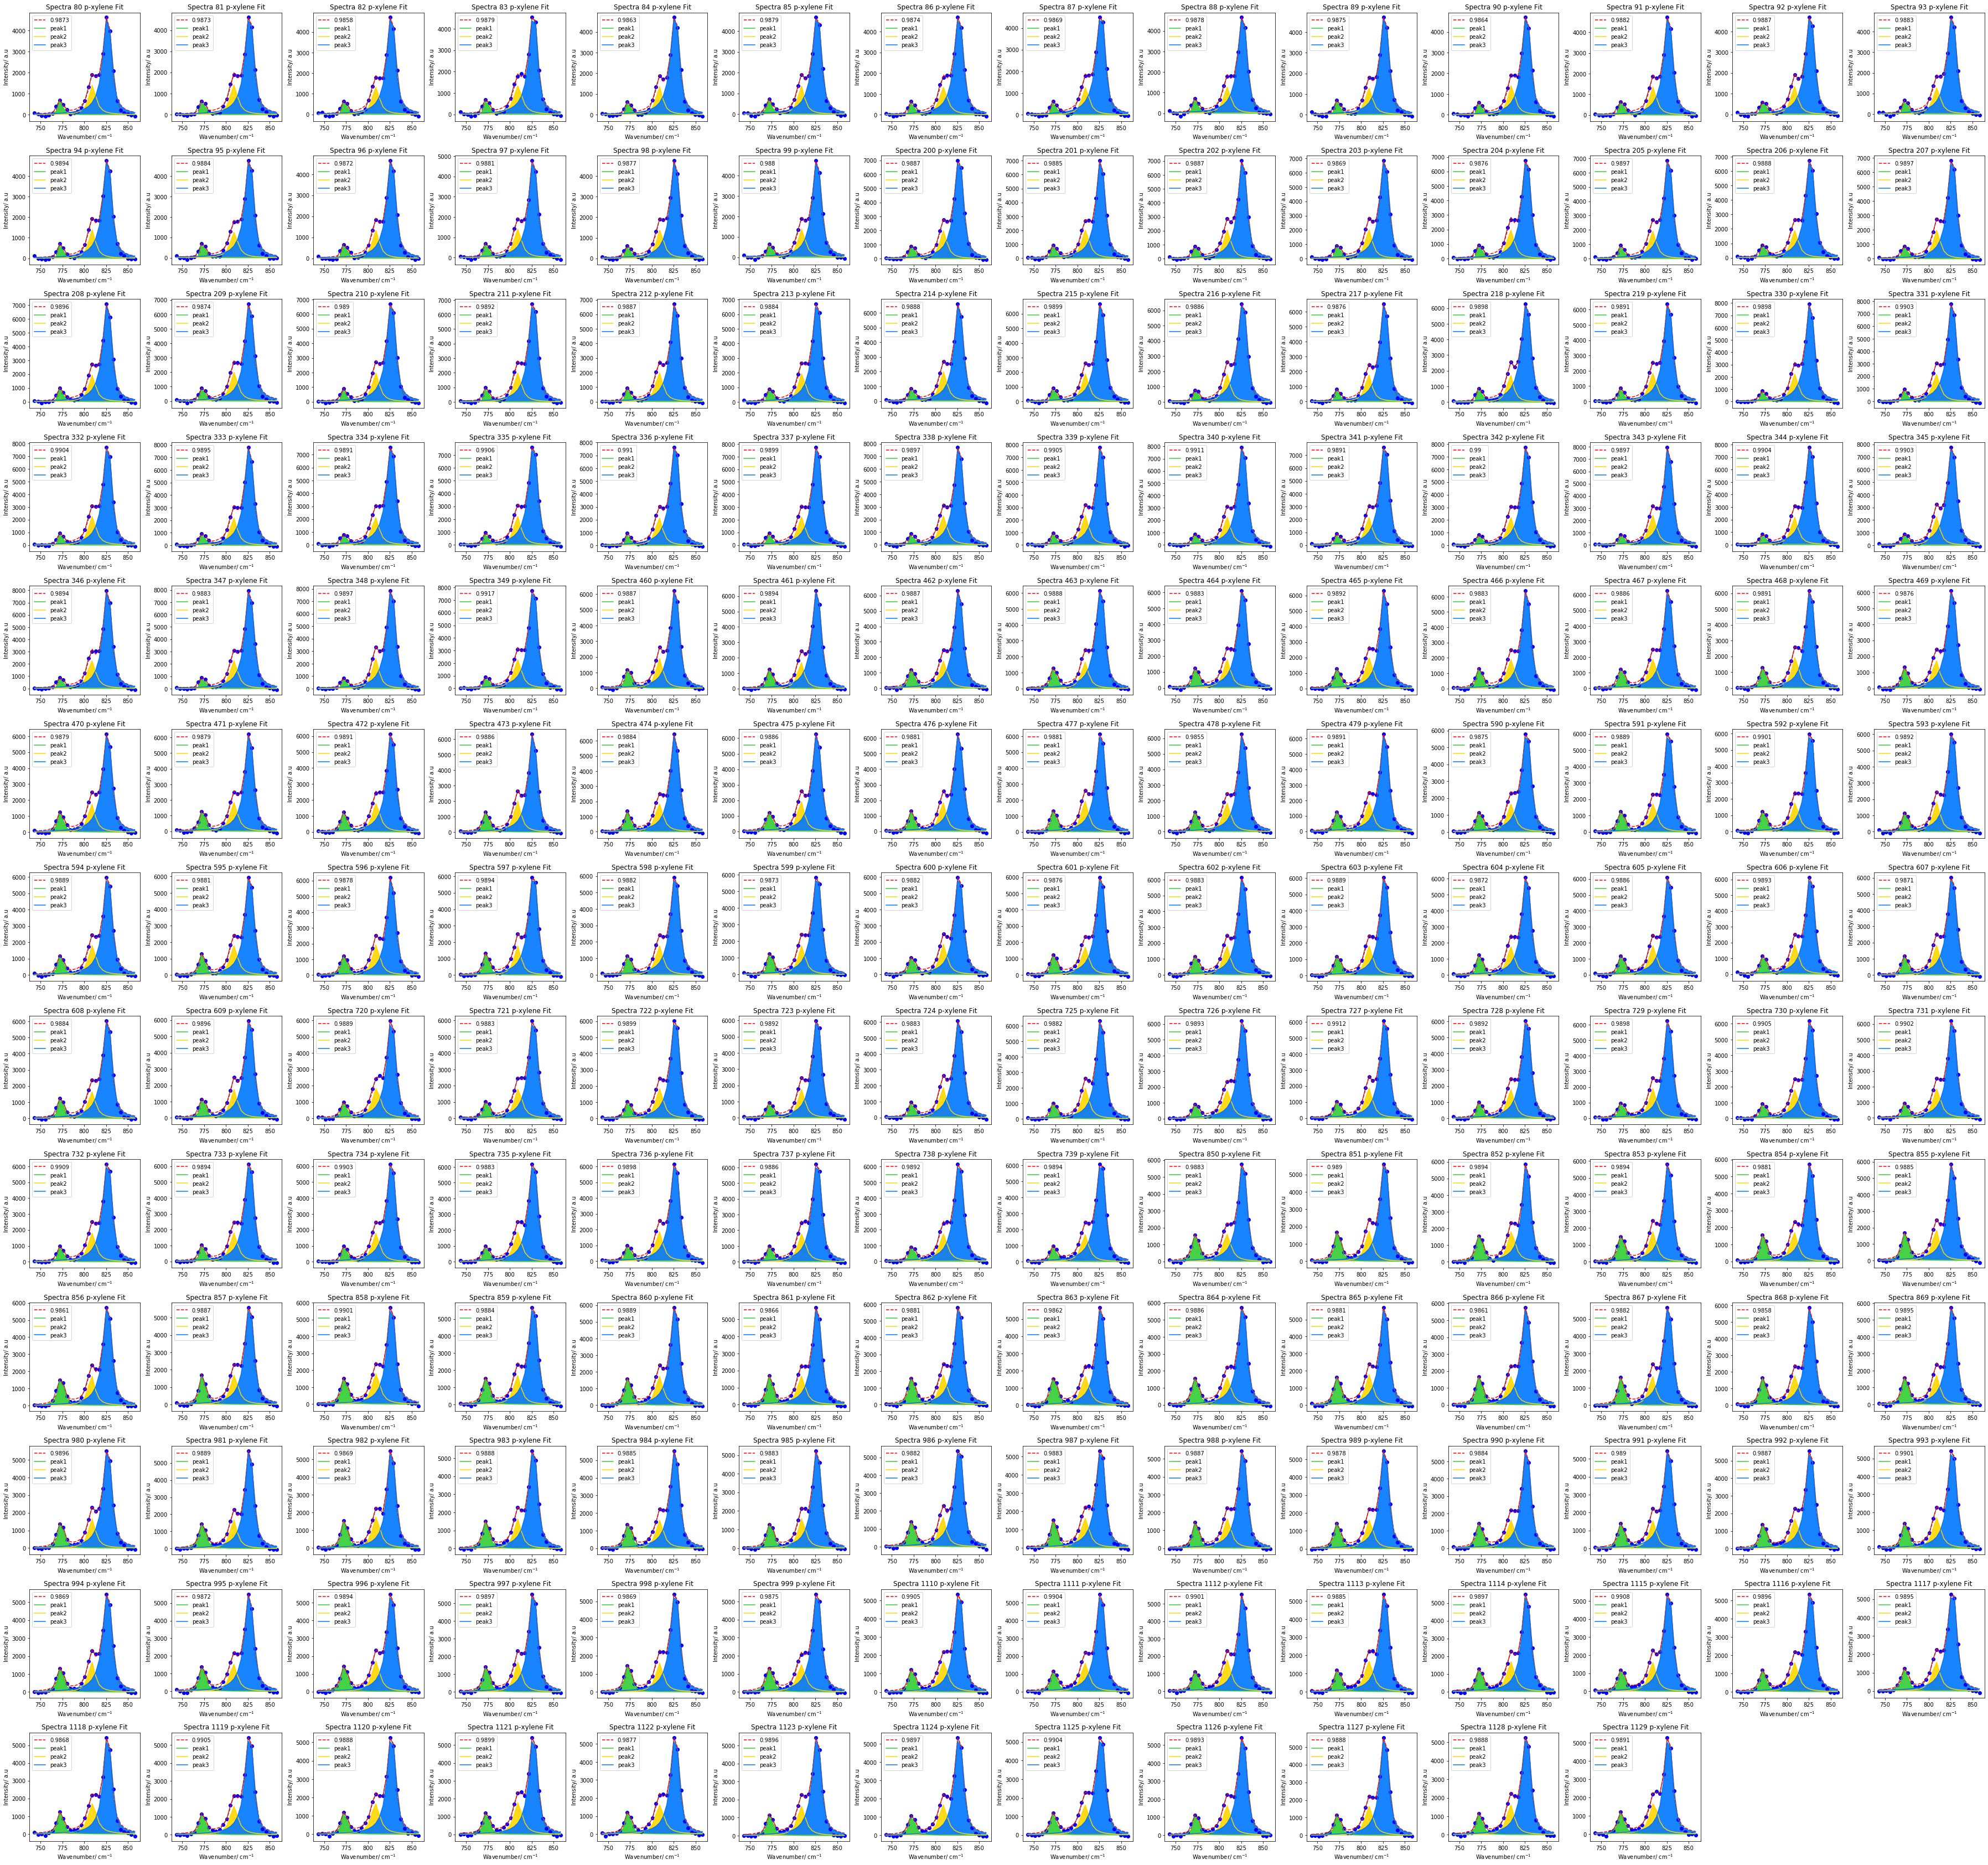

In [24]:
de = collections.deque([])
Area_1 = collections.deque([])
Area_2 = collections.deque([])
Area_3 = collections.deque([])

pbar = tqdm(total = len(df_pxyl), dynamic_ncols  = True, desc = 'Fitting curves')

plt.figure(figsize = (50,50))

pfit = Parameters()
pfit.add(name='ampL1', value = ampL1, min = 0)
pfit.add(name='ampL2', value = ampL2, min = 0)
pfit.add(name='ampL3', value = ampL3, min = 0)
pfit.add(name='cenL1', value = cenL1, min = 770, max = 780)
pfit.add(name='cenL2', value = cenL2, min = 805, max = 815)
pfit.add(name='cenL3', value = cenL3, min = 820, max = 830)
pfit.add(name='widL1', value = widL1, min = 0)
pfit.add(name='widL2', value = widL2, min = 0)
pfit.add(name='widL3', value = widL3, min = 0)
pfit.add(name='widL4', value = widL4, min = 0)

for i,item in df_pxyl.iterrows():
    
    x = df_pxyl.columns # Wavenumbers
    
    y = item # Intensities
    
    xbl = []

    for items in y.index[:5].values.tolist():
        xbl.append(items)

    for items in y.index[25:].values.tolist():
        xbl.append(items)


    ybl = []

    for items in y.values[:5].tolist():
        ybl.append(items)

    for items in y.values[25:].tolist():
        ybl.append(items)
    
    blpars = np.polyfit(xbl, ybl, 1)
    blfit = np.poly1d(blpars)
    
    y -= blfit(x) # Corrected Intensities

    mini = Minimizer(residuals, pfit, fcn_args=(x, y))
    out = mini.leastsq()
    best_fit = y + out.residual
    
    fit_params = out.params.valuesdict()
    fit_params['R2'] = r2_score(y,best_fit)
    fit_params['FWHM_L1'] = 2*out.params.valuesdict()['widL1']
    fit_params['FWHM_L2'] = 2*out.params.valuesdict()['widL2']
    fit_params['FWHM_L3'] = out.params.valuesdict()['widL3'] + out.params.valuesdict()['widL4']
    fit_params['Height_L1'] = 0.318309886*out.params.valuesdict()['ampL1']/max(2.220446049250313e-16, out.params.valuesdict()['widL1'])
    fit_params['Height_L2'] = 0.318309886*out.params.valuesdict()['ampL2']/max(2.220446049250313e-16, out.params.valuesdict()['widL2'])
    fit_params['Height_L3'] = 0.318309886*out.params.valuesdict()['ampL3']/max(2.220446049250313e-16, out.params.valuesdict()['widL3']+out.params.valuesdict()['widL4'])
    
    results = de.append(fit_params)
    
    peak1 = lorentzian(x,out.params.valuesdict()['ampL1'], out.params.valuesdict()['cenL1'], out.params.valuesdict()['widL1'])
    peak2 = lorentzian(x,out.params.valuesdict()['ampL2'], out.params.valuesdict()['cenL2'], out.params.valuesdict()['widL2'])
    peak3 = split_lorentzian(x,out.params.valuesdict()['ampL3'], out.params.valuesdict()['cenL3'], out.params.valuesdict()['widL3'], out.params.valuesdict()['widL4'])
    
    plt.subplot(np.ceil(np.sqrt(df_pxyl.shape[0])),np.ceil(np.sqrt(df_pxyl.shape[0])),(1+i))
    plt.title('Spectra ' + str(df.loc[i, 'Original Index']) + ' p-xylene Fit')
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity/ a.u')
    plt.plot(x, y, '#606060')
    plt.plot(x, y, 'bo')
    plt.plot(x, best_fit, 'r--', label = str(fit_params['R2'].round(decimals = 4)))
    plt.plot(x, peak1,'#32CD32', label = 'peak1')
    plt.fill_between(x, peak1.min(), peak1, facecolor = '#32CD32', alpha = 0.9)
    plt.plot(x, peak2,'#FFD700', label = 'peak2')
    plt.fill_between(x, peak2.min(), peak2, facecolor = '#FFD700', alpha = 0.9)
    plt.plot(x, peak3,'#0077FF', label = 'peak3')
    plt.fill_between(x, peak3.min(), peak3, facecolor = '#0077FF', alpha = 0.9)
    plt.legend(loc='best')
   
    Area_1.append(integrate.simps(peak1, x)) 
    Area_2.append(integrate.simps(peak2, x))
    Area_3.append(integrate.simps(peak3, x))
    
    pbar.update(1)
    
plt.tight_layout()
plt.show()

In [25]:
results = pd.DataFrame(de)
results.rename(columns={'R2':'R2_pxyl'}, inplace=True)
results.describe()

ampL1         ampL2          ampL3       cenL1       cenL2  \
count     180.000000    180.000000     180.000000  180.000000  180.000000   
mean    15103.961014  29184.445919  111096.534625  773.491717  808.922332   
std     16061.612039   4065.653798   15767.181561    0.299641    0.303708   
min      5352.562887  19991.277132   84096.959526  772.592213  808.140528   
25%      8685.159665  27125.311933  100856.251968  773.264426  808.704608   
50%     12999.463157  29381.333869  110712.381788  773.500803  808.921788   
75%     16130.459399  31202.856905  117090.838030  773.759512  809.091210   
max    126663.242312  39348.776182  149785.536352  774.044510  809.994853   

            cenL3       widL1       widL2       widL3       widL4     R2_pxyl  \
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
mean   827.571446    2.760783    5.228449    6.695658    4.304316    0.988731   
std      0.131231    0.969163    0.303361    0.247667    0.097406    0.001158   
min    827.211961    0.051554    4.441025    5.975394    3.980202    0.985544   
25%    827.499116    2.022146    5.023836    6.540874    4.242049    0.988109   
50%    827.568554    3.059881    5.209704    6.694856    4.315503    0.988725   
75%    827.657305    3.500619    5.410485    6.862869    4.372970    0.989511   
max    827.997282    4.315045    6.150662    7.368472    4.544103    0.991735   

          FWHM_L1     FWHM_L2     FWHM_L3      Height_L1    Height_L2  \
count  180.000000  180.000000  180.000000     180.000000   180.000000   
mean     5.521565   10.456897   10.999974   16843.562970  1778.246348   
std      1.938326    0.606721    0.262419   93920.122304   241.137537   
min      0.103109    8.882050   10.112314     662.353000  1256.197150   
25%      4.044291   10.047672   10.838833    1195.894362  1643.947545   
50%      6.119763   10.419408   10.984041    1361.602432  1768.885305   
75%      7.001237   10.820970   11.170406    1592.842854  1891.531322   
max      8.630090   12.301324   11.690385  734648.231738  2432.099503   

         Height_L3  
count   180.000000  
mean   3215.323144  
std     452.056425  
min    2434.054020  
25%    2911.311691  
50%    3209.634799  
75%    3351.055935  
max    4245.681957

In [26]:
df_area = pd.concat([df_area, pd.Series(Area_3), results['R2_pxyl']], axis=1)
df_area.rename(columns={0: 'pxyl Peak Area'}, inplace=True)
df_area

Original Index  Condition  Vinyl Peak Area  R2_Vinyl  pxyl Peak Area  \
0                80          1     62242.450334  0.965687    79584.392656   
1                81          1     60092.870923  0.963150    80688.092466   
2                82          1     61602.716359  0.965474    80514.000040   
3                83          1     61741.205455  0.962908    79164.129574   
4                84          1     60742.694428  0.964101    82331.994357   
..              ...        ...              ...       ...             ...   
175            1125          9    105502.910373  0.978015    94980.695272   
176            1126          9    103469.737779  0.978815    93457.901696   
177            1127          9    105655.691135  0.979317    92632.795139   
178            1128          9    105422.083073  0.979061    93068.340581   
179            1129          9    104903.072990  0.978365    88583.815728   

      R2_pxyl  
0    0.987266  
1    0.987300  
2    0.985795  
3    0.987923  
4    0.986251  
..        ...  
175  0.990393  
176  0.989321  
177  0.988792  
178  0.988776  
179  0.989093  

[180 rows x 6 columns]

In [27]:
# Keep only columns with R2 values above a threshold.
df_area = df_area[(df_area['R2_Vinyl'] > 0.95) & (df_area['R2_pxyl'] > 0.95)]

# Normalization
df_area['Vinyl Divide pxyl'] =  df_area['Vinyl Peak Area'] / df_area['pxyl Peak Area']

df_area

Original Index  Condition  Vinyl Peak Area  R2_Vinyl  pxyl Peak Area  \
0                80          1     62242.450334  0.965687    79584.392656   
1                81          1     60092.870923  0.963150    80688.092466   
2                82          1     61602.716359  0.965474    80514.000040   
3                83          1     61741.205455  0.962908    79164.129574   
4                84          1     60742.694428  0.964101    82331.994357   
..              ...        ...              ...       ...             ...   
175            1125          9    105502.910373  0.978015    94980.695272   
176            1126          9    103469.737779  0.978815    93457.901696   
177            1127          9    105655.691135  0.979317    92632.795139   
178            1128          9    105422.083073  0.979061    93068.340581   
179            1129          9    104903.072990  0.978365    88583.815728   

      R2_pxyl  Vinyl Divide pxyl  
0    0.987266           0.782094  
1    0.987300           0.744755  
2    0.985795           0.765118  
3    0.987923           0.779914  
4    0.986251           0.737778  
..        ...                ...  
175  0.990393           1.110783  
176  0.989321           1.107127  
177  0.988792           1.140586  
178  0.988776           1.132738  
179  0.989093           1.184224  

[180 rows x 7 columns]

In [28]:
# View the summary statistics
df_area_stats = df_area[['Condition', 'Vinyl Divide pxyl']].groupby('Condition').describe()
df_area_stats

Vinyl Divide pxyl                                                    \
                      count      mean       std       min       25%       50%   
Condition                                                                       
1                      20.0  0.747428  0.027707  0.675081  0.737182  0.752064   
2                      20.0  0.681059  0.025193  0.615602  0.665260  0.687002   
3                      20.0  0.576381  0.027442  0.527296  0.549790  0.583675   
4                      20.0  1.049088  0.022227  0.999618  1.031609  1.052065   
5                      20.0  1.043222  0.019766  1.009296  1.030201  1.042370   
6                      20.0  0.842461  0.029281  0.793857  0.828989  0.845277   
7                      20.0  1.429793  0.024199  1.385312  1.415033  1.425448   
8                      20.0  1.342842  0.034083  1.289601  1.327111  1.340409   
9                      20.0  1.165279  0.041164  1.107127  1.129578  1.163881   

                               
                75%       max  
Condition                      
1          0.762563  0.783830  
2          0.699876  0.713117  
3          0.597767  0.619416  
4          1.064802  1.081385  
5          1.056154  1.097326  
6          0.858802  0.914183  
7          1.447311  1.485230  
8          1.361052  1.441986  
9          1.187360  1.237340

In [29]:
mean = df_area_stats['Vinyl Divide pxyl', 'mean'].values
std = df_area_stats['Vinyl Divide pxyl', 'std'].values
condition = range(1,10)

In [30]:
df_ratio = pd.DataFrame({'Condition':condition, 'Mean Ratio':mean, 'Standard Deviation': std})
df_ratio

Condition  Mean Ratio  Standard Deviation
0          1    0.747428            0.027707
1          2    0.681059            0.025193
2          3    0.576381            0.027442
3          4    1.049088            0.022227
4          5    1.043222            0.019766
5          6    0.842461            0.029281
6          7    1.429793            0.024199
7          8    1.342842            0.034083
8          9    1.165279            0.041164

In [31]:
df_ratio.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_t120_ratio.csv')